In [1]:
import numpy as np

In [5]:
%time np.random.random(10000).sum()

CPU times: user 121 µs, sys: 1 µs, total: 122 µs
Wall time: 124 µs


5001.160507205544

In [6]:
%timeit np.random.random(10000).sum()

115 µs ± 7.19 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
def sum_slow():
    x = np.random.random(10000)
    total = 0
    for item in x:
        total += item
    return total

In [15]:
%timeit sum_slow()

3.23 ms ± 512 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
# Interface Python and Fortran/C/C++
# Cython 
# Numba
from numba import jit

@jit(nopython=True)
def sum_fast():
    x = np.random.random(10000)
    total = 0
    for item in x:
        total += item
    return total

In [17]:
%timeit sum_fast()

The slowest run took 8.27 times longer than the fastest. This could mean that an intermediate result is being cached.
177 µs ± 180 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
x = np.arange(100).reshape(10, 10)

@jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def go_fast(a): # Function is compiled to machine code when called the first time
    trace = 0.0
    for i in range(a.shape[0]):   # Numba likes loops
        trace += np.tanh(a[i, i]) # Numba likes NumPy functions
    return a + trace              # Numba likes NumPy broadcasting

In [19]:
def go_slow(a): # Function is compiled to machine code when called the first time
    trace = 0.0
    for i in range(a.shape[0]):   # Numba likes loops
        trace += np.tanh(a[i, i]) # Numba likes NumPy functions
    return a + trace              # Numba likes NumPy broadcasting

In [20]:
%timeit go_slow(x)

35.3 µs ± 5.23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [22]:
%timeit go_fast(x)

1.54 µs ± 122 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# Histograms ...

In [23]:
x = np.random.random(1000)

In [24]:
x.shape

(1000,)

(array([ 98.,  91., 105.,  90.,  98.,  93.,  95., 103., 112., 115.]),
 array([2.47952897e-05, 1.00009545e-01, 1.99994295e-01, 2.99979045e-01,
        3.99963794e-01, 4.99948544e-01, 5.99933294e-01, 6.99918044e-01,
        7.99902793e-01, 8.99887543e-01, 9.99872293e-01]),
 <BarContainer object of 10 artists>)

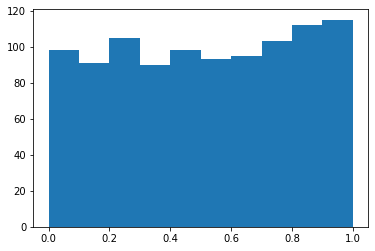

In [26]:
import matplotlib.pyplot as plt
plt.hist(x)

In [30]:
histo, bins = np.histogram(x, bins=2)

In [31]:
histo

array([482, 518])

In [32]:
bins

array([2.47952897e-05, 4.99948544e-01, 9.99872293e-01])

<BarContainer object of 2 artists>

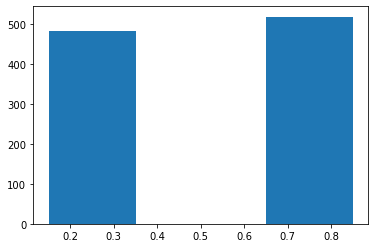

In [40]:
bw=bins[1] - bins[0]
plt.bar(bins[0:-1]+bw/2,histo, width = 0.2)

In [38]:
bins[0:-1]+bw/2

0.9998722930302769

# Reading from and writing to xyz files ...

In [1]:
!ls *.xyz

solution.xyz  unknown.xyz


In [26]:
import numpy as np
def readxyz(filename):
    myfile = open(filename, 'r')
    lines = myfile.readlines()
    natoms = int(lines[0])
    atname = []
    coord = np.zeros((natoms, 3))
    
    for i in range(natoms):
        cols = lines[2+i].split()
        atname.append(cols[0])
        coord[i] = [float(i) for i in cols[1:]]

    myfile.close()
    return natoms, atname, coord

In [39]:
def writexyz(pos, atnames, fname):
    npart = pos.shape[0]
    with open(fname, 'w') as mf:
        mf.write(f'{npart}\n')
        mf.write(f'Coordinates of {npart} LJ particles ...\n')
        for i in range(npart):
            mf.write(f'{atnames[i]}\t'+'\t\t\t'.join([str(x) for x in pos[i]])+'\n')

In [28]:
output = readxyz('solution.xyz')

In [30]:
output[0]

14

In [31]:
output[1]

['C', 'C', 'H', 'H', 'H', 'C', 'O', 'H', 'H', 'N', 'H', 'H', 'H', 'H']

In [32]:
output[2]

array([[ 5.68040e-01,  1.62529e+00,  3.76000e-03],
       [ 1.99154e+00,  1.20004e+00,  3.20300e-01],
       [-1.45660e-01,  8.98030e-01,  4.05560e-01],
       [ 4.00930e-01,  1.66352e+00, -1.07830e+00],
       [ 3.42850e-01,  2.60783e+00,  4.29170e-01],
       [ 3.02564e+00,  2.18621e+00, -2.49350e-01],
       [ 2.22210e+00, -9.15400e-02, -2.47010e-01],
       [ 2.11573e+00,  1.11004e+00,  1.40560e+00],
       [ 3.19532e+00, -1.41510e-01, -3.51950e-01],
       [ 4.38334e+00,  1.66237e+00, -3.85300e-02],
       [ 2.92428e+00,  3.17042e+00,  2.19410e-01],
       [ 2.87771e+00,  2.30078e+00, -1.32890e+00],
       [ 4.58294e+00,  1.63858e+00,  9.62520e-01],
       [ 5.05471e+00,  2.31857e+00, -4.39380e-01]])

In [33]:
natoms, atnames, coords = readxyz('solution.xyz')

In [36]:
coords

array([[ 5.68040e-01,  1.62529e+00,  3.76000e-03],
       [ 1.99154e+00,  1.20004e+00,  3.20300e-01],
       [-1.45660e-01,  8.98030e-01,  4.05560e-01],
       [ 4.00930e-01,  1.66352e+00, -1.07830e+00],
       [ 3.42850e-01,  2.60783e+00,  4.29170e-01],
       [ 3.02564e+00,  2.18621e+00, -2.49350e-01],
       [ 2.22210e+00, -9.15400e-02, -2.47010e-01],
       [ 2.11573e+00,  1.11004e+00,  1.40560e+00],
       [ 3.19532e+00, -1.41510e-01, -3.51950e-01],
       [ 4.38334e+00,  1.66237e+00, -3.85300e-02],
       [ 2.92428e+00,  3.17042e+00,  2.19410e-01],
       [ 2.87771e+00,  2.30078e+00, -1.32890e+00],
       [ 4.58294e+00,  1.63858e+00,  9.62520e-01],
       [ 5.05471e+00,  2.31857e+00, -4.39380e-01]])

In [40]:
writexyz(coords, atnames, 'test.xyz')

In [8]:
filename = 'solution.xyz'
myfile = open(filename, 'r')

In [9]:
lines = myfile.readlines()

In [10]:
lines

['14\n',
 'Solution!\n',
 'C \t  0.56804 \t  1.62529 \t 0.00376\n',
 'C \t  1.99154 \t  1.20004 \t 0.3203\n',
 'H \t  -0.14566 \t  0.89803 \t 0.40556\n',
 'H \t  0.40093 \t  1.66352 \t -1.0783\n',
 'H \t  0.34285 \t  2.60783 \t 0.42917\n',
 'C \t  3.02564 \t  2.18621 \t -0.24935\n',
 'O \t  2.2221 \t  -0.09154 \t -0.24701\n',
 'H \t  2.11573 \t  1.11004 \t 1.4056\n',
 'H \t  3.19532 \t  -0.14151 \t -0.35195\n',
 'N \t  4.38334 \t  1.66237 \t -0.03853\n',
 'H \t  2.92428 \t  3.17042 \t 0.21941\n',
 'H \t  2.87771 \t  2.30078 \t -1.3289\n',
 'H \t  4.58294 \t  1.63858 \t 0.96252\n',
 'H \t  5.05471 \t  2.31857 \t -0.43938\n']

In [13]:
natoms = int(lines[0])

In [14]:
natoms

14

In [15]:
lines[2]

'C \t  0.56804 \t  1.62529 \t 0.00376\n'

In [16]:
lines[2].split()

['C', '0.56804', '1.62529', '0.00376']

In [17]:
cols = lines[2].split()

In [18]:
cols[0]

'C'

In [19]:
cols[1:]

['0.56804', '1.62529', '0.00376']

In [21]:
#List comprehension
[float(i) for i in cols[1:]]

[0.56804, 1.62529, 0.00376]

In [23]:
import numpy as np
np.array([float(i) for i in cols[1:]])

array([0.56804, 1.62529, 0.00376])

In [25]:
myfile.close()